In [2]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dense

In [7]:
# 데이터 로드 및 전처리
# 데이터 로딩
df = pd.read_csv("C:\\Users\\LG\\Downloads\\AAME.csv")
df_filtered = df[df['Open'] != 0.0].reset_index(drop=True)

In [9]:
# Open, High, Low, Close 컬럼만 추출
features = df_filtered[['Open', 'High', 'Low', 'Close']].values

In [11]:
# 정규화
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
# 시계열 샘플 생성 함수
def make_multivariate_io(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])     # shape: (window, 4)
        y.append(data[i+window])       # shape: (4,) → Open, High, Low, Close
    return np.array(X), np.array(y)


In [15]:
# 시퀀스 생성
window_size = 7
X, y = make_multivariate_io(scaled_features, window_size)

In [19]:
# 훈련/테스트 분할
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [23]:
# 모델 정의
model = Sequential()
model.add(Input(shape=(window_size, 4)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dense(4))  # Open, High, Low, Close 예측

model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# 예측
pred = model.predict(X_test)


Epoch 1/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0073
Epoch 2/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.8267e-04
Epoch 3/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.2291e-04
Epoch 4/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.7484e-04
Epoch 5/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.7097e-04
Epoch 6/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.7158e-04
Epoch 7/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.2932e-04
Epoch 8/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.4604e-04
Epoch 9/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.4822e-04
Epoch 10/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.5062e-04
Epoch 11/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.3212e-04
Epoch 12/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.1314e-04
Epoch 13/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.5335e-04
Epoch 14/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.

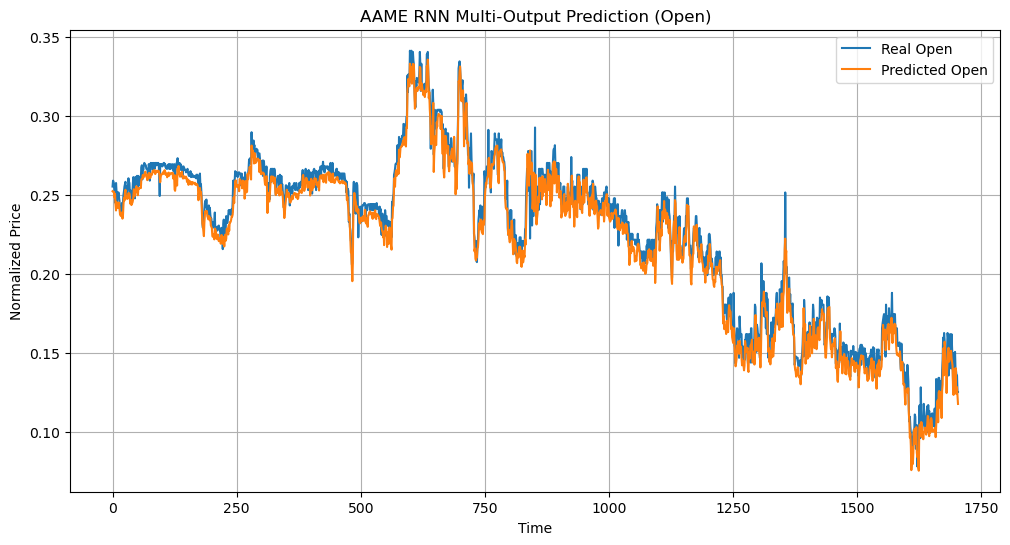

In [24]:
# 11. 시각화 (Open)
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], label='Real Open')      # Open
plt.plot(pred[:, 0], label='Predicted Open')   # Open
plt.title("AAME RNN Multi-Output Prediction (Open)")
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

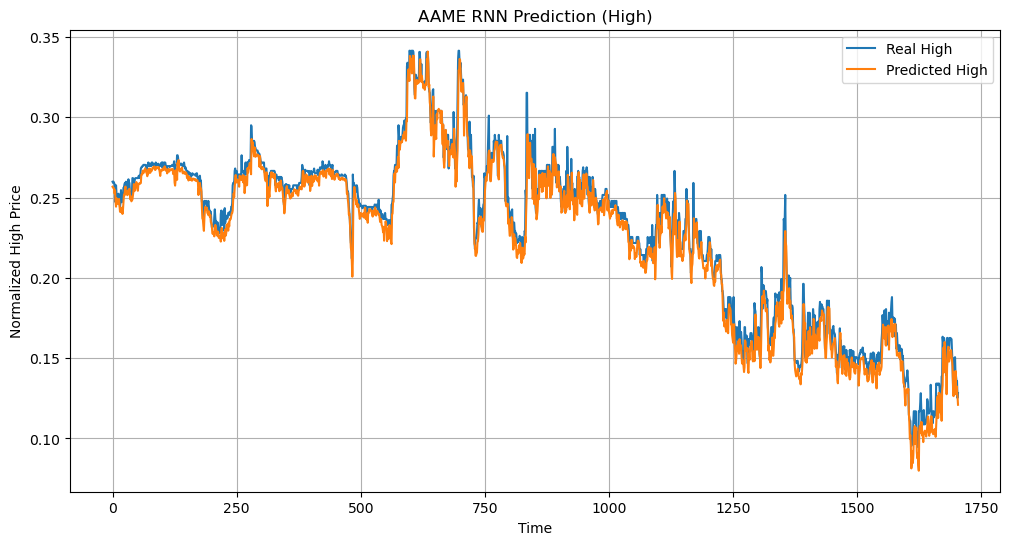

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 1], label='Real High')      # 실제 High
plt.plot(pred[:, 1], label='Predicted High')   # 예측 High
plt.title("AAME RNN Prediction (High)")
plt.xlabel("Time")
plt.ylabel("Normalized High Price")
plt.legend()
plt.grid(True)
plt.show()

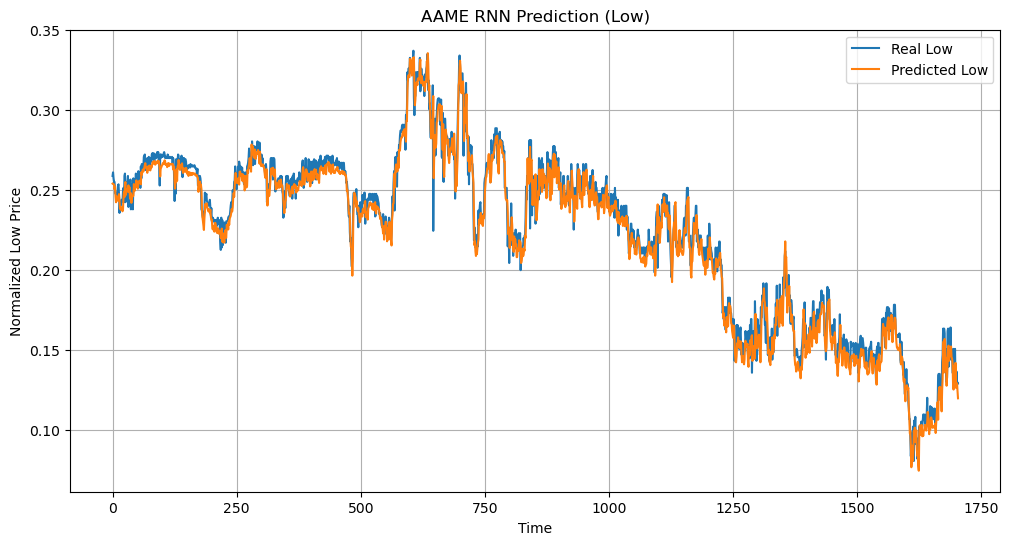

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 2], label='Real Low')      # 실제 Low
plt.plot(pred[:, 2], label='Predicted Low')   # 예측 Low
plt.title("AAME RNN Prediction (Low)")
plt.xlabel("Time")
plt.ylabel("Normalized Low Price")
plt.legend()
plt.grid(True)
plt.show()

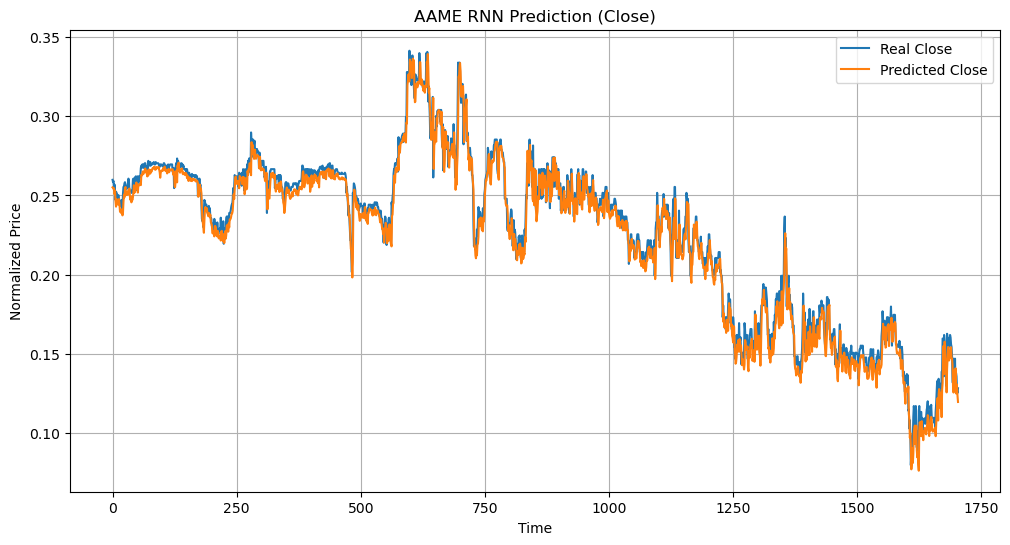

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 3], label='Real Close')      # 실제 Close
plt.plot(pred[:, 3], label='Predicted Close')   # 예측 Close
plt.title("AAME RNN Prediction (Close)")
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()